### <strong><font color=cornflowerblue>第四次作品：以蒙地卡羅實驗驗證 J-B 檢定統計量的卡方分配與檢定力的表現</font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：

本作品通過蒙地卡羅實驗（Monte Carlo Simulation）驗證以 Skewness 為基礎的 $G_1$ 統計量（$G_1 = \sqrt{\frac{n}{6}}\hat{s} $），以 Kurtosis 為基礎的 $G_2$ 統計量（$ G_2 = \sqrt{\frac{n}{24}}(\hat{k} - 3) $）是否依據理論上服從標準常態 N(0, 1)，以及由兩者結合形成的 $G_3$ 統計量（$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\big(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\big) $）是否依據理論上服從卡方 $\chi^2(2)$，其中 $G_3$ 統計量為著名的 J-B (Jarque-Bera) 常態檢定統計量。
此外，繼續通過蒙地卡羅實驗來驗證 $G_3$ 統計量的檢定力（Power），以及與其他常態檢定的產品進行比較，如 scipy.stats 裡的 D’Agostino and Pearson’s (normaltest)、Kolmogorov-Smirnov test (kstest)、Shapiro-Wilk test (shapiro)、Anderson-Darling test (anderson) 等著名常態檢定方法，觀察它們之間的差異。


<hr>

### <strong><font color=cornflowerblue>目標一</font></strong>：通過蒙地卡羅實驗來驗證以 Skewness 為基礎的 $G_1$ 統計量，以 Kurtosis 為基礎的 $G_2$ 統計量是否服從標準常態 N(0, 1)，以及由兩者結合形成的 $G_3$ 統計量是否服從卡方 $\chi^2(2)$。

- 檢定統計量 $G_1$：
$$ G_1 = \sqrt{\frac{n}{6}}\hat{s} $$
其中 $\hat{s}$ 為偏態係數 Skewness 的估計值。

- 檢定統計量 $G_2$：
$$ G_2 = \sqrt{\frac{n}{24}}(\hat{k} - 3) $$
其中 $\hat{k}$ 為峰態係數 Kurtosis 的估計值。

- 檢定統計量 $G_3$：
$$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\bigg(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\bigg) $$
其中 $\hat{s}$ 為偏態係數 skewness 的估計值，$\hat{k}$ 為峰態係數 Kurtosis 的估計值。

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_1$ 估計值，並繪製出每個樣本數 n 的 $G_1$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的標準常態 PDF 與 CDF 圖，觀察由 $G_1$ 統計量生成的估計值與真實標準常態分配的分佈情況之間的關聯性。

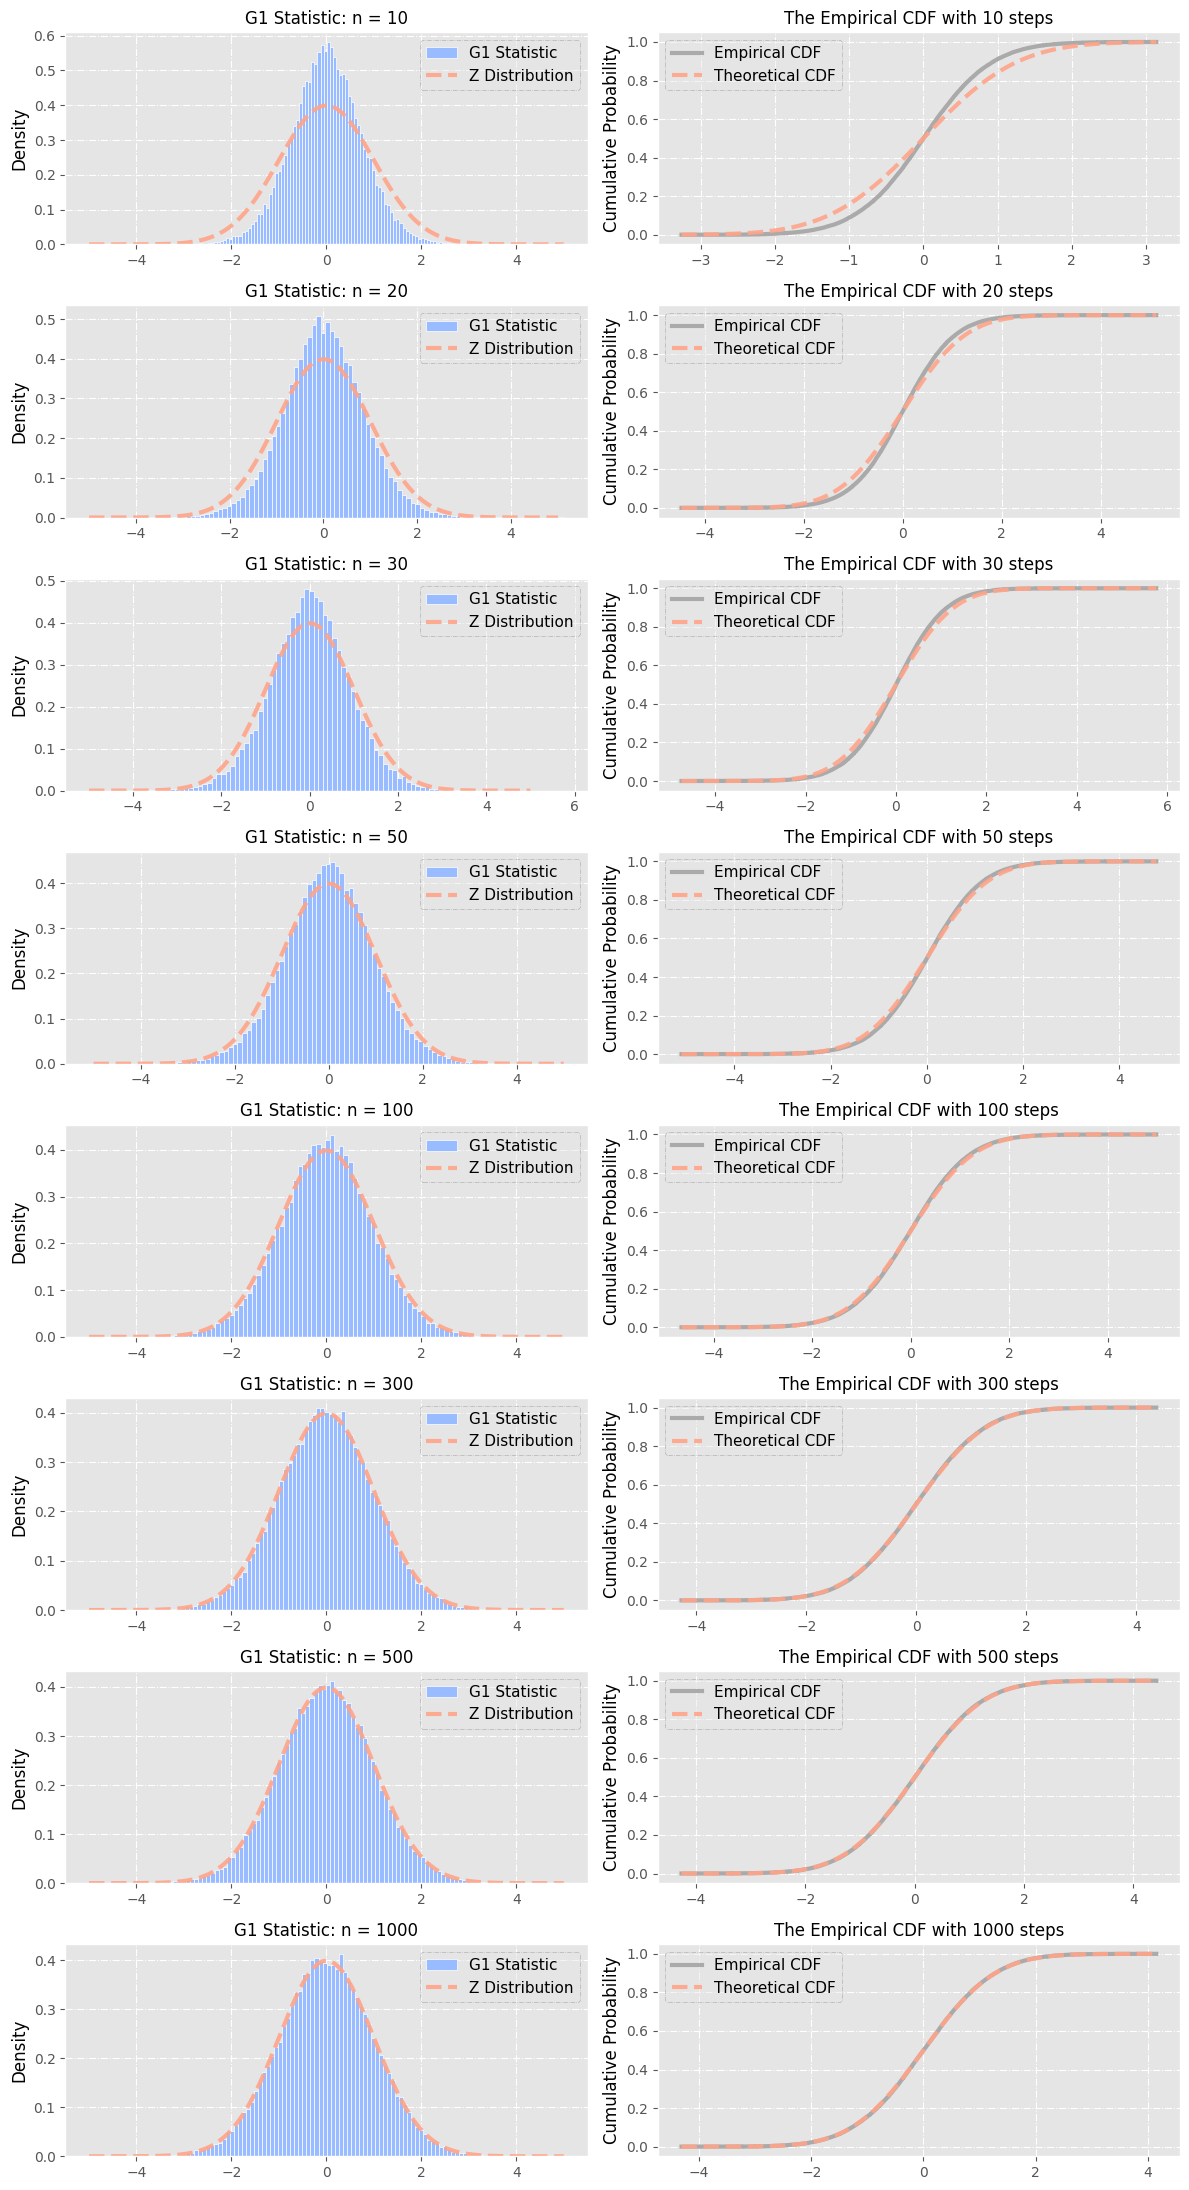

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, skew
from scipy.stats import norm

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000]
G1 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(8, 2, figsize = (12, 22))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for skewness
    x = norm.rvs(0, 1, (N, n))
    # 生成 G1 统计量
    G1 = np.sqrt(n / 6) * skew(x, axis = 1, bias = True) # compute skewness for each row

    # normal PDF
    x_pdf = np.linspace(-5, 5, 1000)
    y_pdf = norm.pdf(x_pdf, 0, 1)

    # 計算 G1 的 ECDF
    res = cumfreq(G1, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # normal CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = norm.cdf(x_cdf, 0, 1)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G1 统计量的直方图與 normal PDF
    ax_pdf.hist(G1, bins = 100, density = True, color = '#99BBFF', edgecolor = '#FFFFFF'
                , label = 'G1 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = 'Z Distribution'
                , alpha = 0.9)
    ax_pdf.set_title('G1 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')

    # G1 统计量的 ECDF 與 normal CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_1$ 統計量的分佈與標準常態分配有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。
- 隨著樣本數 n 的增加，$G_1$ 統計量的分佈逐漸趨近於標準常態分配。當樣本數 n 增加到 300 或以上時，$G_1$ 統計量的分佈與標準常態分配幾乎相同。
- 在樣本數較大的情況下，$G_1$ 統計量的分佈與標準常態分配幾乎完全重合，這表明 $G_1$ 統計量在大樣本的情況下會無限趨近於標準常態分配。
- Empirical CDF 與標準常態 CDF 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與標準常態 CDF 越來越接近，這進一步證明了 $G_1$ 統計量在大樣本的情況下會無限趨近於標準常態分配。

**<font color=lightseagreen>結論</font>**：

- 通過蒙地卡羅模擬實驗，我們驗證了以 Skewness 為基礎的 $G_1$ 統計量在樣本數較大時，如 n $\geq$ 300，其分佈會趨近於標準常態分配 N(0, 1)。
- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_2$ 估計值，並繪製出每個樣本數 n 的 $G_2$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的標準常態 PDF 與 CDF 圖，觀察由 $G_2$ 統計量生成的估計值與真實標準常態分配的分佈情況之間的關聯性。

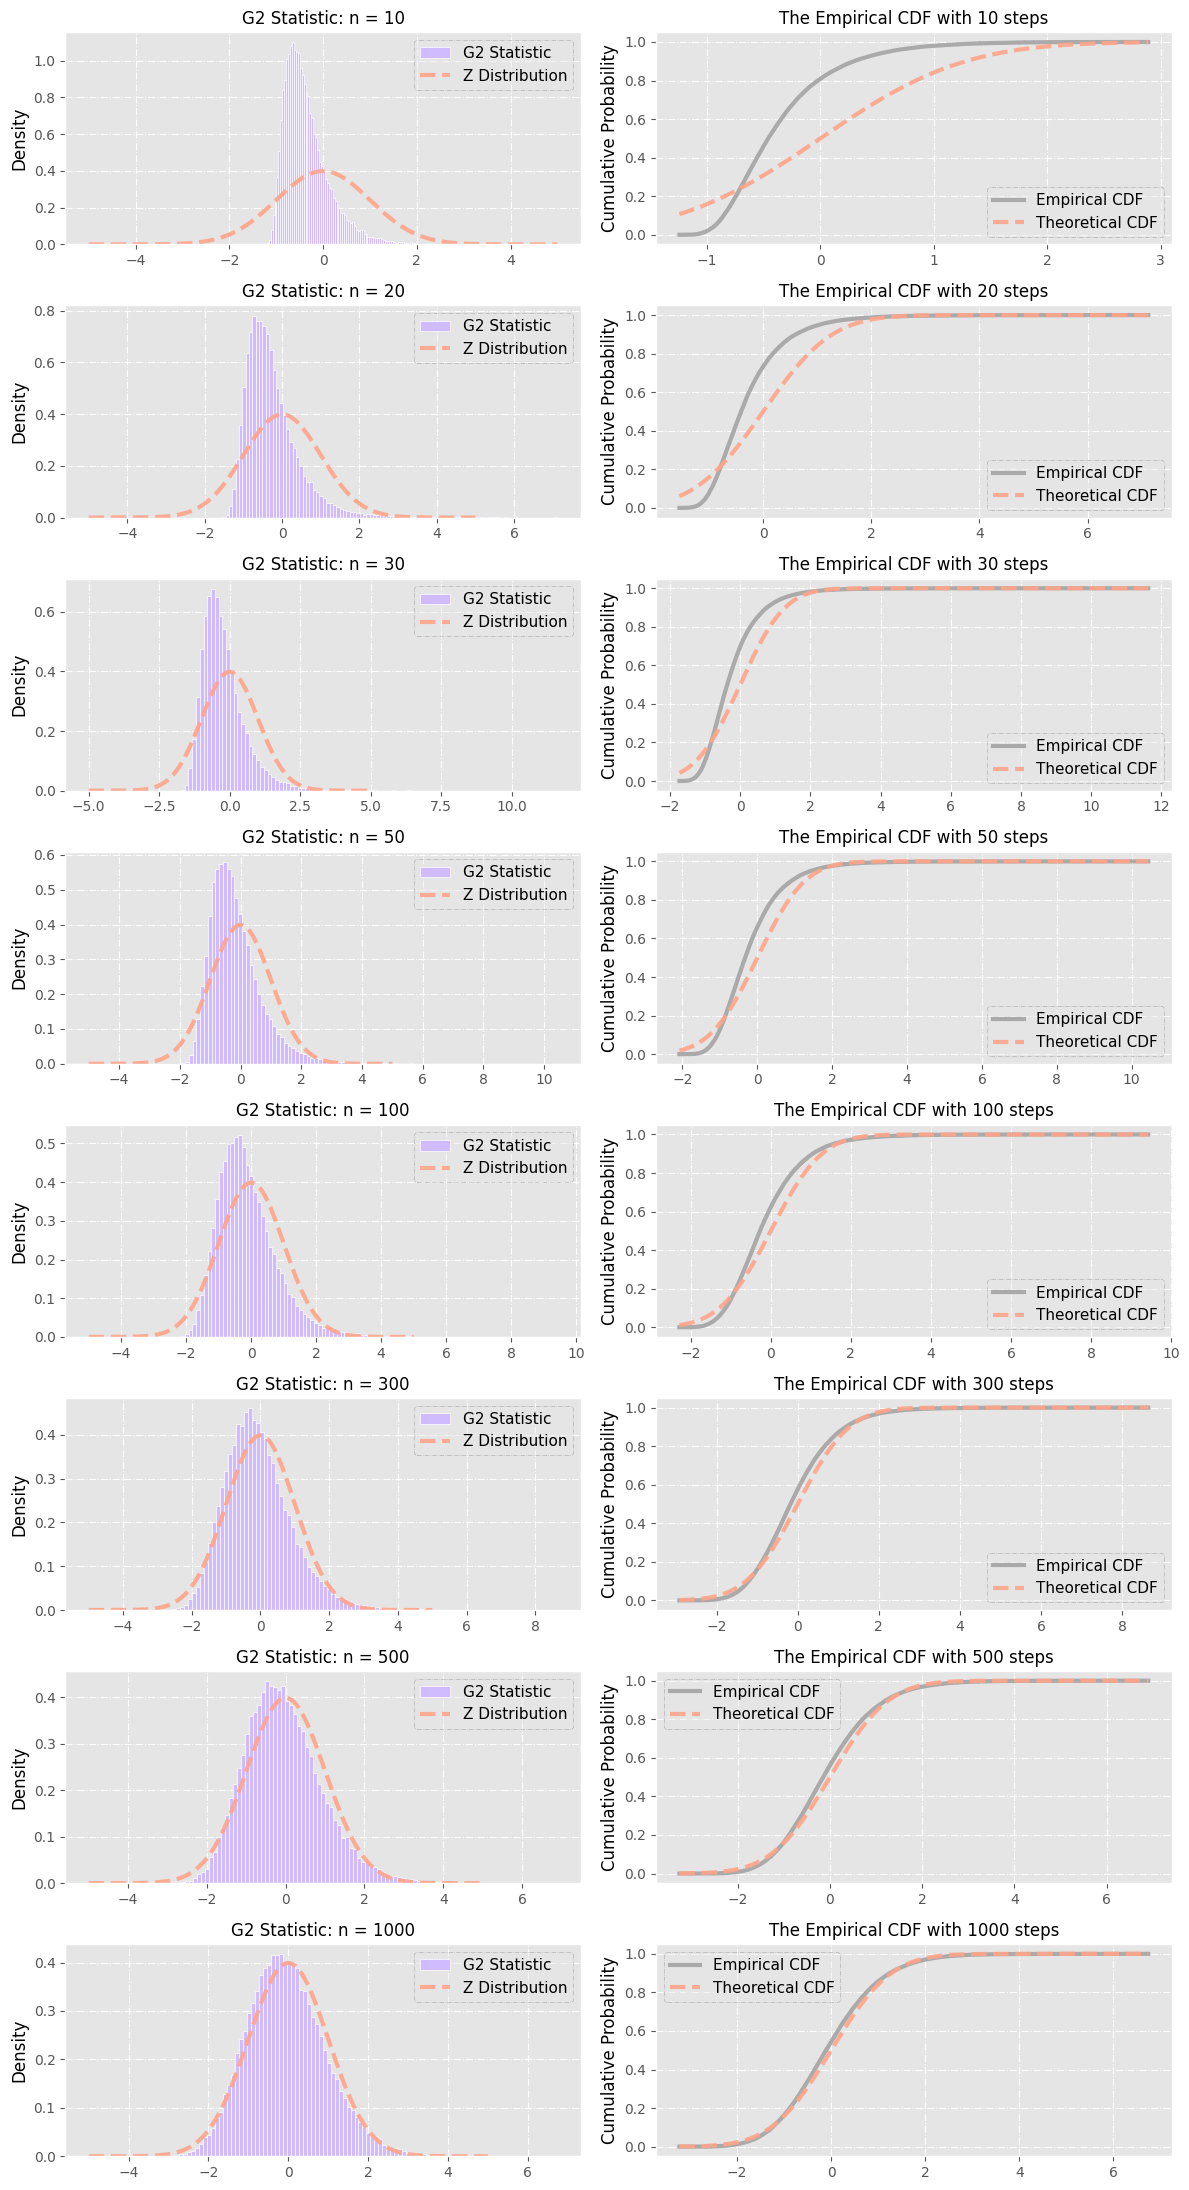

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, kurtosis
from scipy.stats import norm

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000]
G2 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(8, 2, figsize = (12, 22))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for kurtosis
    x = norm.rvs(0, 1, (N, n))
    # 生成 G2 统计量
    # G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = True, fisher = False) - 3)
    G2 = np.sqrt(n / 24) * (kurtosis(x, axis = 1, bias = True, fisher = True))

    # normal PDF
    x_pdf = np.linspace(-5, 5, 1000)
    y_pdf = norm.pdf(x_pdf, 0, 1)

    # 計算 G2 的 ECDF
    res = cumfreq(G2, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # normal CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = norm.cdf(x_cdf, 0, 1)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G2 统计量的直方图與 normal PDF
    ax_pdf.hist(G2, bins = 100, density = True, color = '#D1BBFF', edgecolor = '#FFFFFF'
                , label = 'G2 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = 'Z Distribution'
                , alpha = 0.9)
    ax_pdf.set_title('G2 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')

    # G2 统计量的 ECDF 與 normal CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_2$ 統計量的分佈與標準常態分配有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。
- 隨著樣本數 n 的增加，$G_2$ 統計量的分佈逐漸趨近於標準常態分配。當樣本數 n 增加到 500 或以上時，$G_2$ 統計量的分佈與標準常態分配非常接近。
- 在樣本數較大的情況下，$G_2$ 統計量的分佈與標準常態分配非常接近，這表明 $G_2$ 統計量在大樣本的情況下會趨近於標準常態分配。
- Empirical CDF 與標準常態 CDF 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與標準常態 CDF 越來越接近，這進一步證明了 $G_2$ 統計量在大樣本的情況下會趨近於標準常態分配。

**<font color=lightseagreen>結論</font>**：

- 通過蒙地卡羅模擬實驗，我們驗證了以 Kurtosis 為基礎的 $G_2$ 統計量在樣本數較大時，如 n $\geq$ 500，其分佈會趨近於標準常態分配 N(0, 1)。
- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

#### **<font color=indianred>說明</font>**：生成 n 個來自標準常態 N(0, 1) 的隨機樣本，其中樣本數 n = 10，20，30，50，100，300，500，1000。針對每個樣本數 n 進行 N = 50000 次的蒙地卡羅模擬實驗，計算出 $G_3$ 估計值，並繪製出每個樣本數 n 的 $G_3$ 估計值分佈的直方圖以及 Empirical CDF，且分別畫上對應的卡方 $\chi^2(2)$ PDF 與 CDF 圖，觀察由 $G_3$ 統計量生成的估計值與真實卡方分配 $\chi^2(2)$ 的分佈情況之間的關聯性。

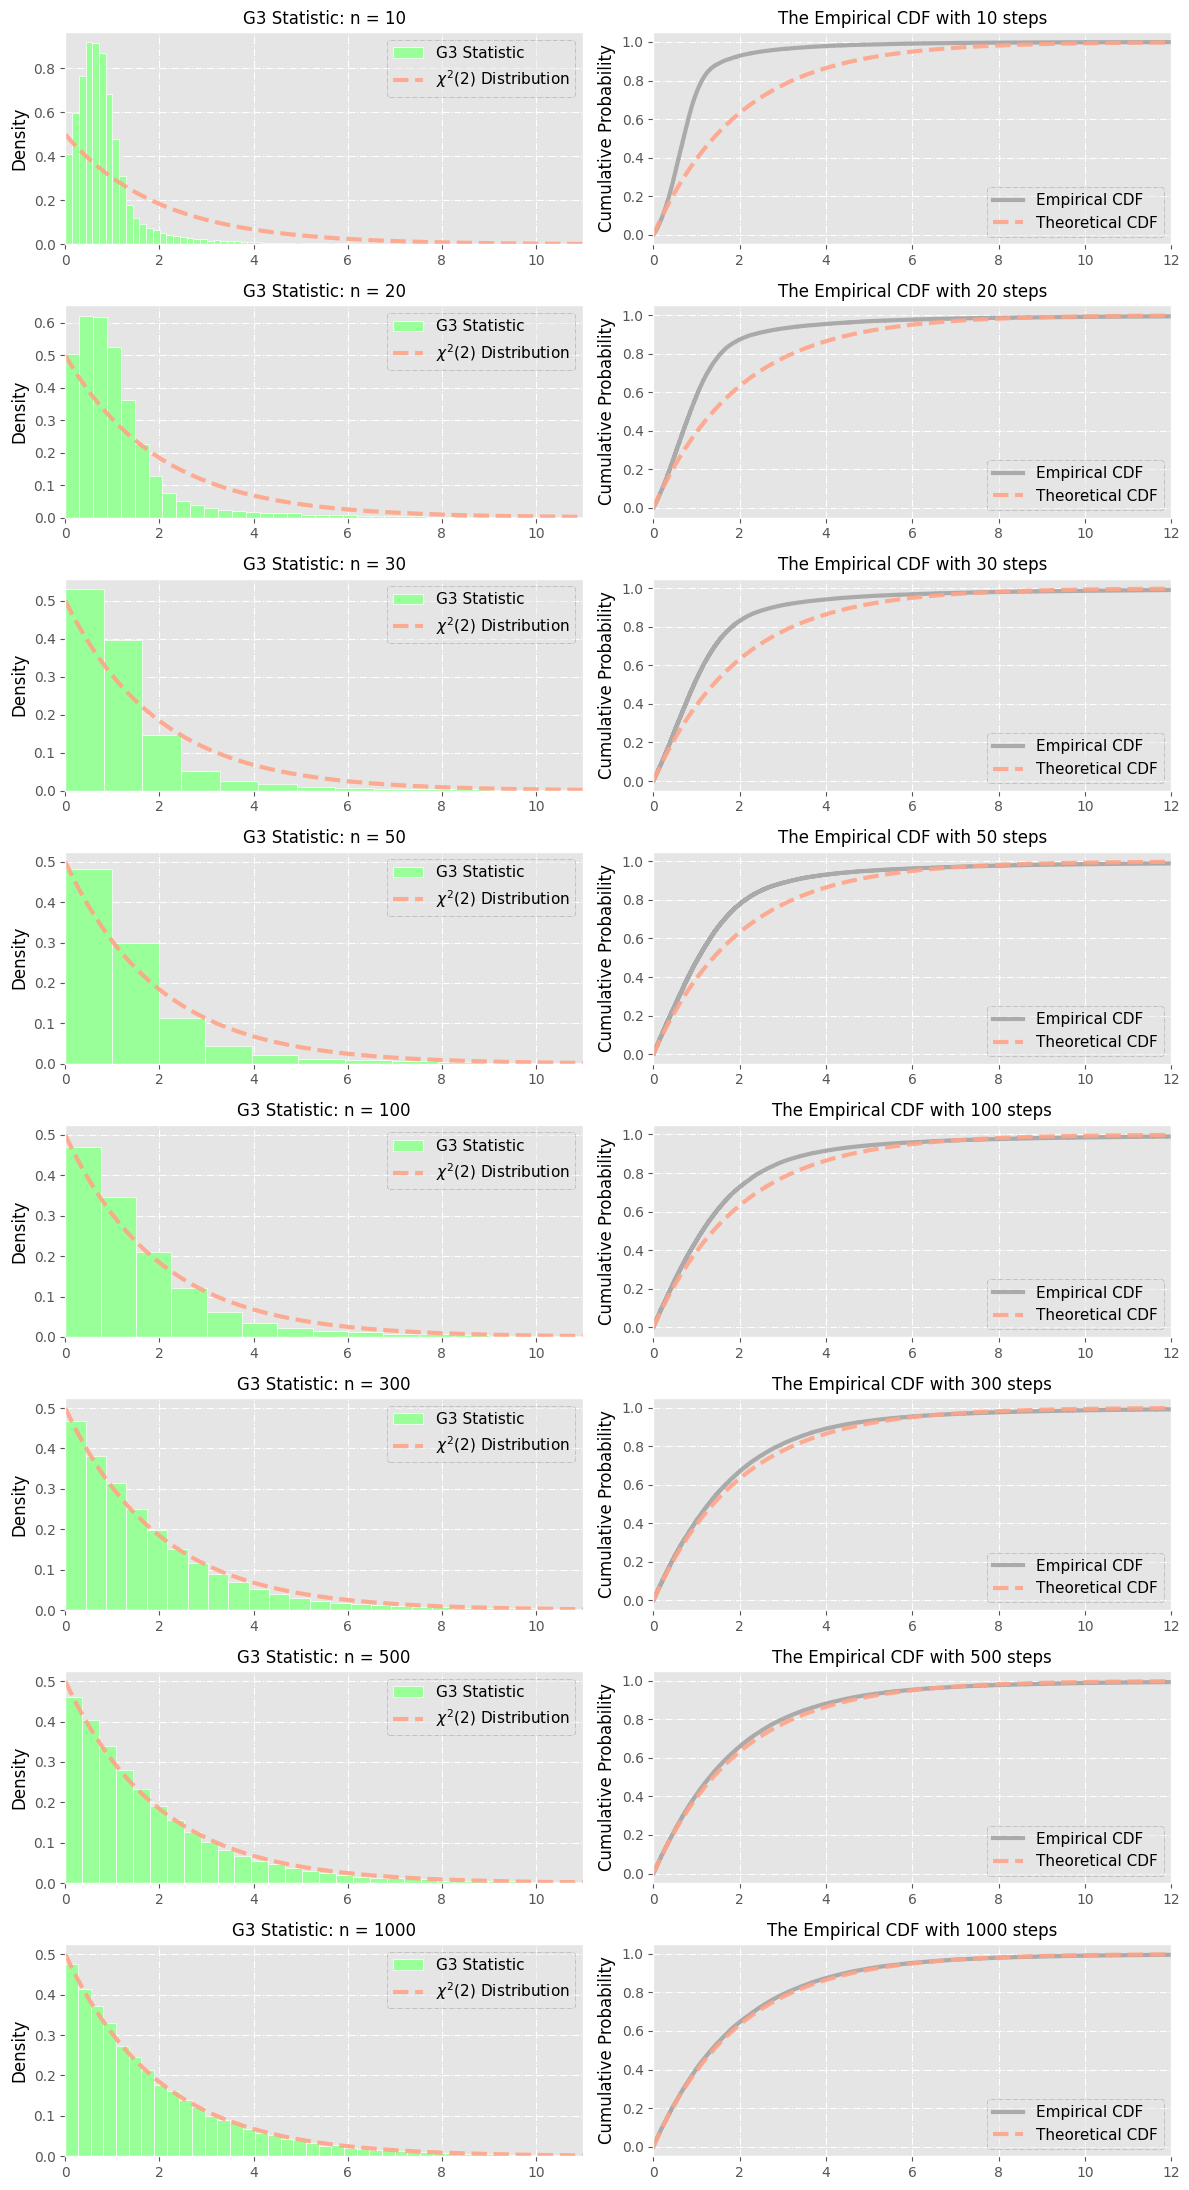

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq, skew, kurtosis
from scipy.stats import norm, chi2

# 抽樣次數
N = 50000
# 樣本數
n_val = [10, 20, 30, 50, 100, 300, 500, 1000] # 要 2000 才會準
G3 = np.zeros((N, len(n_val)))

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(8, 2, figsize = (12, 22))

for i, n in enumerate(n_val):
    # 生成 N rows n columns 服從標準常態分佈的樣本 for kurtosis
    x = norm.rvs(0, 1, (N, n))
    # 生成 G3 统计量
    s = skew(x, axis = 1, bias = True)
    k = kurtosis(x, axis = 1, bias = True, fisher = True)
    G3 = (n / 6) * ((s ** 2) + ((k ** 2) / 4))

    # chi(2) PDF
    x_pdf = np.linspace(min(G3), max(G3), 1000)
    y_pdf = chi2.pdf(x_pdf, 2)

    # 計算 G3 的 ECDF
    res = cumfreq(G3, numbins = N)
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / N  # 累積次數除以總樣本數量 = 累積機率

    # chi(2) CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), 1000)
    y_cdf = chi2.cdf(x_cdf, 2)

    # 設定子圖
    ax_pdf = axs[i, 0]
    ax_cdf = axs[i, 1]

    # G3 统计量的直方图與 chi(2) PDF
    ax_pdf.hist(G3, bins = 150, density = True, color = '#99FF99', edgecolor = '#FFFFFF'
                , label = 'G3 Statistic')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FFA488', lw = 3, linestyle = '--', label = '$\chi^2(2)$ Distribution'
                , alpha = 0.9)
    ax_pdf.set_xlim([0, 11])
    ax_pdf.set_title('G3 Statistic: n = {}'.format(n), fontsize = 12)
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')

    # G3 统计量的 ECDF 與 chi(2) CDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#AAAAAA', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FFA488', label = 'Theoretical CDF', alpha = 0.9, lw = 3
                , linestyle = '--')
    ax_cdf.set_xlim([0, 12])
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(n), fontsize = 12)
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

##### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

- 當樣本數 n 較小時，$G_3$ 統計量的分佈與卡方分配 $\chi^2(2)$ 有較大的偏差。這可能是由於樣本數較小時，估計值的變異較大，導致分佈不穩定。
- 隨著樣本數 n 的增加，$G_3$ 統計量的分佈逐漸趨近於卡方分配 $\chi^2(2)$。當樣本數 n 增加到 300 或以上時，$G_3$ 統計量的分佈與卡方分配 $\chi^2(2)$ 幾乎相同。
- 在樣本數較大的情況下，$G_3$ 統計量的分佈與卡方分配 $\chi^2(2)$ 幾乎完全重合，這表明 $G_3$ 統計量在大樣本的情況下會無限趨近於卡方分配 $\chi^2(2)$。
- Empirical CDF 與卡方分配 $\chi^2(2)$ 的對比圖顯示，隨著樣本數的增加，Empirical CDF 與卡方分配 $\chi^2(2)$ 越來越接近，這進一步證明了 $G_3$ 統計量在大樣本的情況下會無限趨近於卡方分配 $\chi^2(2)$。

**<font color=lightseagreen>結論</font>**：

- 通過以上實驗，證實了 $G_3$ 確實理論上服從卡方分配 $\chi^2(2)$，原因是它是由 $G_1^2$ + $G_2^2$ 所形成的，而 $G_1$、$G_2$ 各自服從標準常態 N(0, 1)，故各自做二次方，分佈會變成 $\chi^2(1)$，再相加，分佈最終形成 $\chi^2(2)$。
- 通過蒙地卡羅模擬實驗，我們驗證了由 Skewness 和 Kurtosis 結合形成的 $G_3$ 統計量在樣本數較大時，其分佈趨近於卡方分配 $\chi^2(2)$。
- 當樣本數較小時，估計值的變異較大，導致分佈不穩定。因此，在進行統計檢定時，應考慮樣本數對檢定結果的影響，並盡量使用較大的樣本數以提高檢定的準確性。

<hr>

### <strong><font color=cornflowerblue>目標二</font></strong>：從不同的母體分配中進行抽樣，用 $G_3$ 檢定統計量以蒙地卡羅模擬方式來進行檢定，驗證其在不同樣本數下的檢定力（Power）。

- 假設檢定（Jarque-Bera 檢定 or $G_3$ 統計量）:
$$ H_0: \text{資料來自常態分佈} $$
$$ H_a: \text{資料不來自常態分佈} $$

- 檢定統計量 $G_3$：
$$ G_3 = G_1^2 + G_2^2 = \frac{n}{6}\bigg(\hat{s}^2 + \frac{(\hat{k} - 3)^2}{4}\bigg) $$
其中 $\hat{s}$ 為偏態係數 skewness 的估計值，$\hat{k}$ 為峰態係數 Kurtosis 的估計值。

- Power:
$$P(Reject\; H_0 | Data \sim H_a) = 0.95$$

- Type I Error:
$$P(Reject\; H_0 | Data \sim H_0) = 0.05$$


<strong><font color=indianred>說明</font></strong>：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, jarque_bera
from scipy.stats import norm, chi2, t

def G3_stats(X):
    """
    Input:
        X: A numpy array of shape (N, n) where N is the number of samples and n is the size of each sample
    Output:
        G3: A numpy array of shape (N,) that contains the G3 statistic for each sample
        p_val: A numpy array of shape (N,) that contains the p-value for each sample
    """
    n = X.shape[1]
    G1 = np.sqrt(n / 6) * skew(X, axis = 1, bias = False) # bias = False 表示 Unbiased
    G2 = np.sqrt(n / 24) * (kurtosis(X, axis = 1, bias = False, fisher = True))
    G3 = G1**2 + G2**2
    P_Val = 1 - chi2.cdf(G3, df = 2)  # chi2.cdf 是指從 0 到 G3 的面積，1 - chi2.cdf 是指從 G3 到無限大的面積
    return G3, P_Val

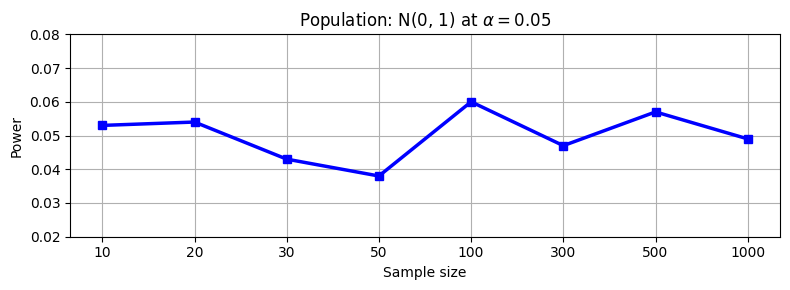

In [ ]:
N = 1000 # number of samples
n = [10, 20, 30, 50, 100, 300, 500, 1000] # sample size
alpha = 0.05

power = np.zeros(len(n))
for i in range(len(n)):
    x = norm.rvs(loc = 0, scale = 1, size = (N, n[i]))
    G3, P_Val = G3_stats(x)
    power[i] = np.mean(P_Val < alpha)

fig = plt.figure(figsize = (8, 3))
plt.plot(power, marker = 's', linestyle = '-', color = 'b', lw = 2.5)
plt.xticks(np.arange(len(n)), labels = n)
plt.xlabel('Sample size')
plt.ylabel('Power')
plt.title('Population: N(0, 1) at $\\alpha = 0.05$')
plt.grid(True)
plt.ylim([0.02, 0.08])

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：

**<font color=lightseagreen>結論</font>**：

<hr>